In [343]:
import os
for dirname, _, filenames in os.walk('../input/cat-and-dog'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
../input/cat-and-dog/test_set/test_set/dogs/dog.4607.jpg
../input/cat-and-dog/test_set/t

In [344]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D #images are two dimensional. Videos are three dimension.
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Plotting Dogs and Cats

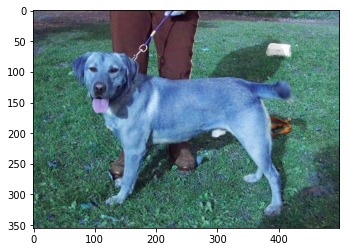

In [345]:
plt.imshow(cv2.imread("../input/cat-and-dog/training_set/training_set/dogs/dog.1005.jpg"))

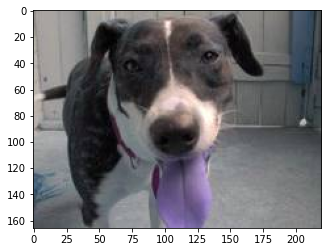

In [346]:
plt.imshow(cv2.imread("../input/cat-and-dog/training_set/training_set/dogs/dog.1003.jpg"))

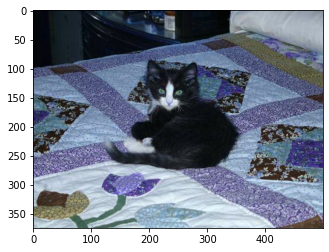

In [347]:
plt.imshow(cv2.imread('../input/cat-and-dog/training_set/training_set/cats/cat.1004.jpg'))

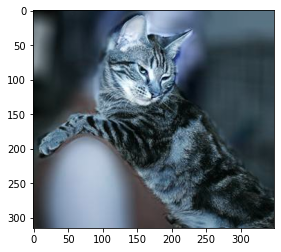

In [348]:
plt.imshow(cv2.imread('../input/cat-and-dog/training_set/training_set/cats/cat.1023.jpg'))

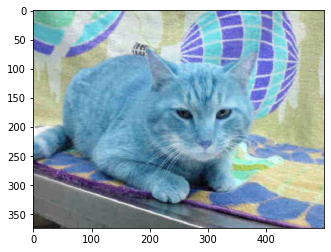

In [349]:
plt.imshow(cv2.imread('../input/cat-and-dog/training_set/training_set/cats/cat.1019.jpg'))

# Preprocessing the training set

In [350]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/kaggle/input/cat-and-dog/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


# Preprocessing the test set

In [351]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../input/cat-and-dog/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


# Convolutional Layers

In [352]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=[64,64,3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


# Neural Networks

In [353]:

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(1, activation='sigmoid'))

In [354]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [355]:
model.fit(x = training_set, validation_data = test_set, epochs = 31)

Epoch 1/31
251/251 [==============================] - 38s 147ms/step - loss: 0.6958 - accuracy: 0.5039 - val_loss: 0.6942 - val_accuracy: 0.5101
Epoch 2/31
251/251 [==============================] - 37s 146ms/step - loss: 0.6906 - accuracy: 0.5282 - val_loss: 0.6810 - val_accuracy: 0.5630
Epoch 3/31
251/251 [==============================] - 36s 145ms/step - loss: 0.6783 - accuracy: 0.5596 - val_loss: 0.6643 - val_accuracy: 0.5670
Epoch 4/31
251/251 [==============================] - 36s 145ms/step - loss: 0.6635 - accuracy: 0.5779 - val_loss: 0.6477 - val_accuracy: 0.6243
Epoch 5/31
251/251 [==============================] - 38s 150ms/step - loss: 0.6523 - accuracy: 0.6258 - val_loss: 0.6125 - val_accuracy: 0.6560
Epoch 6/31
251/251 [==============================] - 37s 148ms/step - loss: 0.6217 - accuracy: 0.6738 - val_loss: 0.5578 - val_accuracy: 0.7247
Epoch 7/31
251/251 [==============================] - 38s 150ms/step - loss: 0.5888 - accuracy: 0.6876 - val_loss: 0.5637 - val_ac

# Lets now predict!

# This is the image we will be using for testing. This is my neighbor Dog. Lets check whether our model tells its a dog.

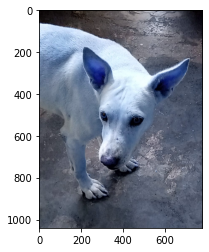

In [358]:
plt.imshow(cv2.imread('../input/neighbordog/IMG-20210826-WA0001.jpg'))

In [365]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/cat-and-dog/test_set/test_set/cats/cat.4011.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


print("This is a :",prediction)


This is a : dog


# Now Lets check for a Cat's image

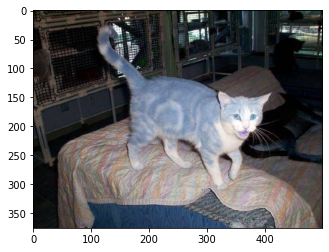

In [363]:
plt.imshow(cv2.imread('../input/cat-and-dog/test_set/test_set/cats/cat.4033.jpg'))

In [366]:
test_image = image.load_img('../input/cat-and-dog/test_set/test_set/cats/cat.4033.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


print("This is a :",prediction)

This is a : cat


# Our Convolution Neural Network model Predicts Accurately